In [4]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle


# Get the data from the inbuilt dataset of BOSTON housing prediction

In [ ]:
housing_data = datasets.load_boston() 

# Shuffle and divide the dataset in train test

In [ ]:
# Shuffle the data
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

# Split the data 80/20 (80% for training, 20% for testing)
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]


# Define regression Model and train

In [ ]:
# Fit decision tree regression model
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

# Fit decision tree regression model with AdaBoost
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
ab_regressor.fit(X_train, y_train)

# Evaluate performance of Decision Tree regressor

In [5]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt) 
print ("\n#### Decision Tree performance ####")
print ("Mean squared error =", round(mse, 2))
print ("Explained variance score =", round(evs, 2))

# Evaluate performance of AdaBoost
y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab) 
print ("\n#### AdaBoost performance ####")
print ("Mean squared error =", round(mse, 2))
print ("Explained variance score =", round(evs, 2))


#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82

#### AdaBoost performance ####
Mean squared error = 7.64
Explained variance score = 0.91


# Show relative Importance of the features on the result

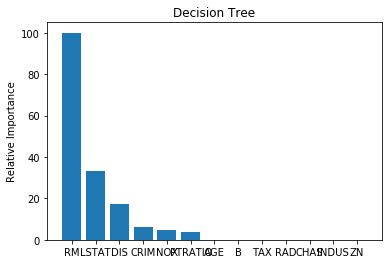

In [16]:
import matplotlib.pyplot as plt

feature_importances = dt_regressor.feature_importances_
feature_names=housing_data.feature_names
feature_importances = 100.0 * (feature_importances / max(feature_importances))
index_sorted = np.flipud(np.argsort(feature_importances))
pos = np.arange(index_sorted.shape[0]) + 2

plt.figure()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title('Decision Tree')
plt.show()

In [18]:
feature_importances.shape

(13,)